# U.S. Clothing Store Retail Sales EDA + Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns 

import patsy
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skewnorm

In [2]:
clothing_sales = pd.read_csv("retailclothingsales.csv")

In [3]:
clothing_sales.head()

,DATE,MRTSSM4481USS
0,1992-01-01,6758
1,1992-02-01,6791
2,1992-03-01,6721
3,1992-04-01,6954
4,1992-05-01,6947


In [4]:
clothing_sales.shape

(339, 2)

In [5]:
clothing_sales.rename(columns = {'MRTSSM4481USS': 'sales', 'DATE':'date'}, inplace = True)
clothing_sales.head()

,date,sales
0,1992-01-01,6758
1,1992-02-01,6791
2,1992-03-01,6721
3,1992-04-01,6954
4,1992-05-01,6947


Text(0.5, 1.0, 'U.S. Clothing Retail Sales from 1992-2020')

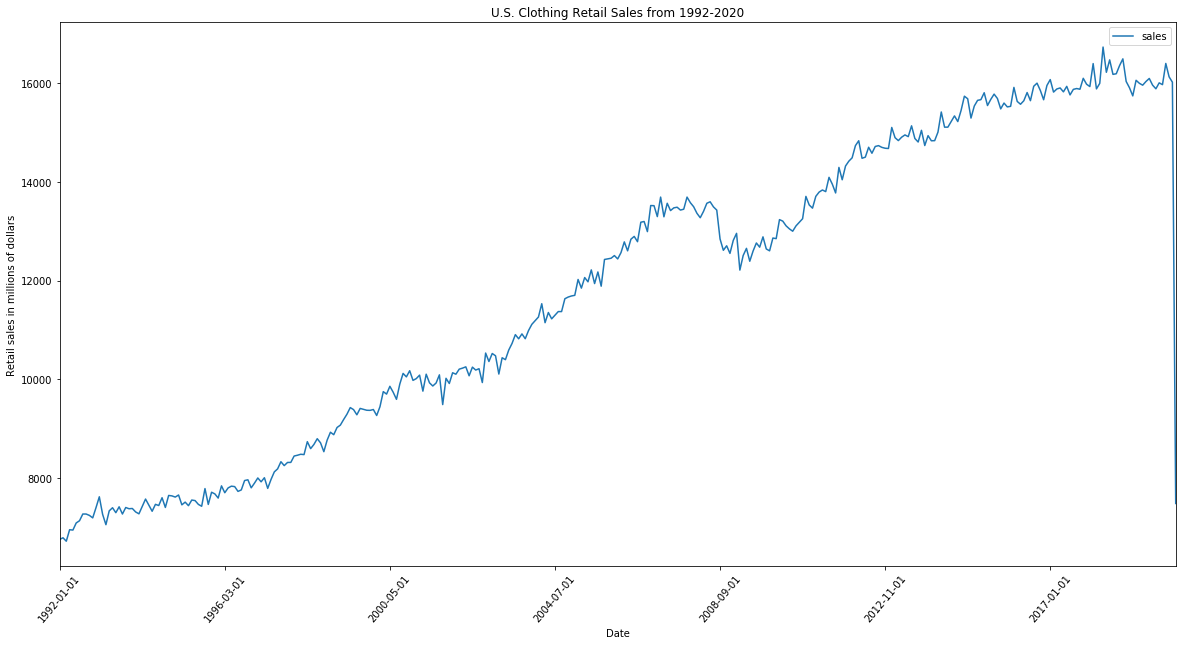

In [6]:
clothing_sales_fig = clothing_sales.plot.line(x='date',rot =50, figsize = (20,10))
clothing_sales_fig.set_xlabel('Date')
clothing_sales_fig.set_ylabel('Retail sales in millions of dollars')
clothing_sales_fig.set_title('U.S. Clothing Retail Sales from 1992-2020')

In [7]:
inflation_rates = pd.read_csv("inflation_values.csv")
inflation_rates.head()

,Unnamed: 0,inflation rate in %,adjusted inflation
0,0,0.15%,0.998500
1,1,0.36%,0.994905
2,2,0.51%,0.989831
3,3,0.14%,0.988446
4,4,0.14%,0.987062


In [8]:
inflation_rates.shape

(339, 3)

In [9]:
inflation_rates.rename(columns = {'Unnamed: 0':'year'}, inplace = True)
inflation_rates.set_index('year')

,inflation rate in %,adjusted inflation
year,,
0,0.15%,0.998500
1,0.36%,0.994905
2,0.51%,0.989831
3,0.14%,0.988446
4,0.14%,0.987062
...,...,...
334,-0.05%,0.533561
335,-0.09%,0.534041
336,0.39%,0.531958


In [10]:
clothing_sales = clothing_sales.assign(inflation = inflation_rates['inflation rate in %']) 
clothing_sales = clothing_sales.assign(inflation_adjusted = inflation_rates['adjusted inflation']) 
clothing_sales.head()

,date,sales,inflation,inflation_adjusted
0,1992-01-01,6758,0.15%,0.998500
1,1992-02-01,6791,0.36%,0.994905
2,1992-03-01,6721,0.51%,0.989831
3,1992-04-01,6954,0.14%,0.988446
4,1992-05-01,6947,0.14%,0.987062


In [11]:
sales_inflated = []
for ind, row in clothing_sales.iterrows():
    if (ind == 0):
        sales = clothing_sales.loc[ind, 'sales'] 
        sales_inflated.append(sales)
    elif (ind == 339): 
        continue
    else:
        sales = clothing_sales.loc[ind, 'sales']
        percent_inflation = (clothing_sales.loc[ind-1, 'inflation_adjusted']) 
        adjusted = sales * percent_inflation
        sales_inflated.append(adjusted)

In [12]:
clothing_sales = clothing_sales.assign(sales_adjusted = sales_inflated)
clothing_sales.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted
0,1992-01-01,6758,0.15%,0.998500,6758.000000
1,1992-02-01,6791,0.36%,0.994905,6780.813500
2,1992-03-01,6721,0.51%,0.989831,6686.759193
3,1992-04-01,6954,0.14%,0.988446,6883.287434
4,1992-05-01,6947,0.14%,0.987062,6866.731712


In [13]:
clothing_sales.to_csv('clothing_sales_eda.csv')

Text(0.5, 1.0, 'U.S. Clothing Retail Sales from 1992-2020')

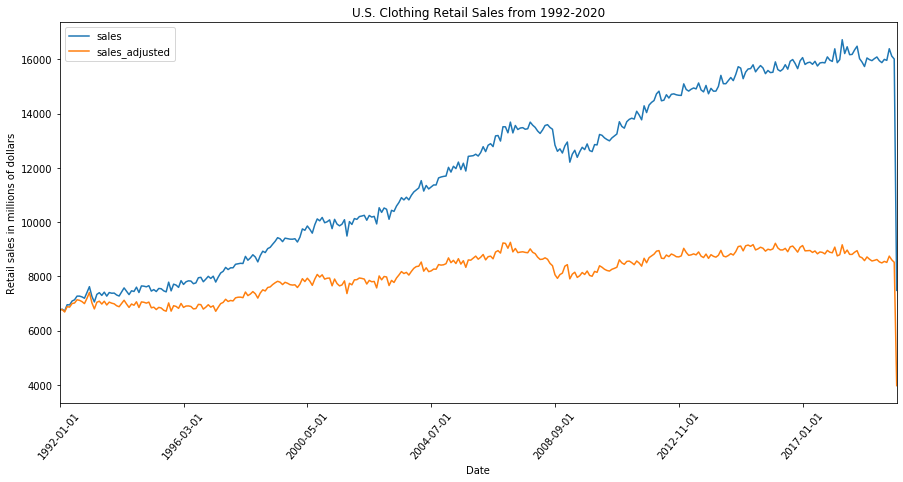

In [14]:
fig = clothing_sales.plot.line(x='date',y=['sales','sales_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('U.S. Clothing Retail Sales from 1992-2020')

Text(0.5, 1.0, 'U.S. Clothing Retail Sales from 1992-2020')

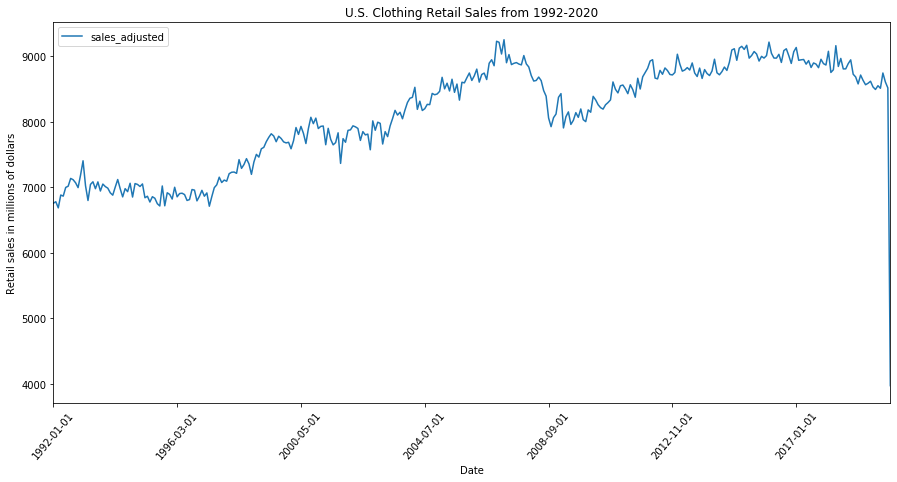

In [15]:
fig = clothing_sales.plot.line(x='date',y=['sales_adjusted'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_ylabel('Retail sales in millions of dollars')
fig.set_title('U.S. Clothing Retail Sales from 1992-2020')

In [16]:
#read in presidential approval ratings data
approval_ratings = pd.read_csv('ApprovalDataTo1989.csv')
approval_ratings.head()

,End Date,Approving,Disapproving,Unsure/NoData,President
0,2020-04-30,46.0,50.5,5.5,Trump
1,2020-03-31,46.5,48.5,5.0,Trump
2,2020-02-29,48.0,49.5,2.5,Trump
3,2020-01-31,46.5,51.5,2.0,Trump
4,2019-12-31,45.0,51.0,4.0,Trump


Text(0.5, 1.0, 'Presidential Approval/Disapproval Ratings from 1992-2020')

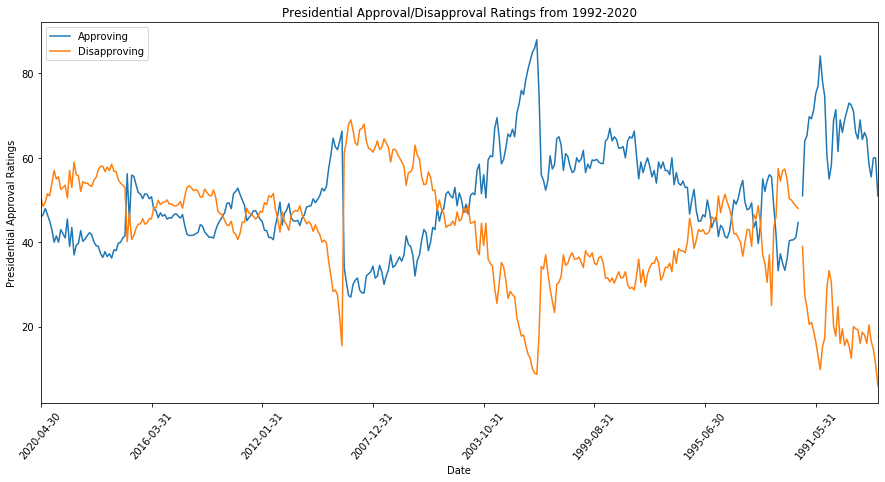

In [17]:
fig = approval_ratings.plot.line(x='End Date', y=['Approving', 'Disapproving'], rot = 50, figsize = (15, 7))
fig.set_xlabel('Date')
fig.set_ylabel('Presidential Approval Ratings')
fig.set_title('Presidential Approval/Disapproval Ratings from 1992-2020')

In [18]:
#add column to approval_ratings and clothing_sales with month only 
approval_ratings = approval_ratings.assign(date_month_only = approval_ratings['End Date'].str[:7])
clothing_sales = clothing_sales.assign(date_month_only = clothing_sales['date'].str[:7])
clothing_sales.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only
0,1992-01-01,6758,0.15%,0.998500,6758.000000,1992-01
1,1992-02-01,6791,0.36%,0.994905,6780.813500,1992-02
2,1992-03-01,6721,0.51%,0.989831,6686.759193,1992-03
3,1992-04-01,6954,0.14%,0.988446,6883.287434,1992-04
4,1992-05-01,6947,0.14%,0.987062,6866.731712,1992-05


In [19]:
df_merged = pd.merge(clothing_sales, approval_ratings, how = 'outer')
df_merged

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,6758.0,0.15%,0.998500,6758.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,6791.0,0.36%,0.994905,6780.813500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,6721.0,0.51%,0.989831,6686.759193,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,6954.0,0.14%,0.988446,6883.287434,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,6947.0,0.14%,0.987062,6866.731712,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush
...,...,...,...,...,...,...,...,...,...,...,...
374,NaN,NaN,NaN,NaN,NaN,1989-05,1989-05-31,58.400000,20.400000,20.000000,Bush
375,NaN,NaN,NaN,NaN,NaN,1989-04,1989-04-30,55.500000,16.500000,26.500000,Bush
376,NaN,NaN,NaN,NaN,NaN,1989-03,1989-03-31,60.000000,14.666667,24.333333,Bush
377,NaN,NaN,NaN,NaN,NaN,1989-02,1989-02-28,60.000000,11.000000,27.000000,Bush


In [20]:
df_merged.dropna (inplace = True)
df_merged

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President
0,1992-01-01,6758.0,0.15%,0.998500,6758.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush
1,1992-02-01,6791.0,0.36%,0.994905,6780.813500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush
2,1992-03-01,6721.0,0.51%,0.989831,6686.759193,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush
3,1992-04-01,6954.0,0.14%,0.988446,6883.287434,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush
4,1992-05-01,6947.0,0.14%,0.987062,6866.731712,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush
...,...,...,...,...,...,...,...,...,...,...,...
337,2019-11-01,15966.0,-0.05%,0.533561,8514.577584,2019-11,2019-11-30,43.000000,54.000000,3.000000,Trump
338,2019-12-01,16395.0,-0.09%,0.534041,8747.732541,2019-12,2019-12-31,45.000000,51.000000,4.000000,Trump
339,2020-01-01,16124.0,0.39%,0.531958,8610.880334,2020-01,2020-01-31,46.500000,51.500000,2.000000,Trump
340,2020-02-01,16016.0,0.27%,0.530522,8519.846390,2020-02,2020-02-29,48.000000,49.500000,2.500000,Trump


Text(0.5, 1.0, 'Relationship between retail sales of clothing and approval of the president from 1992-2020')

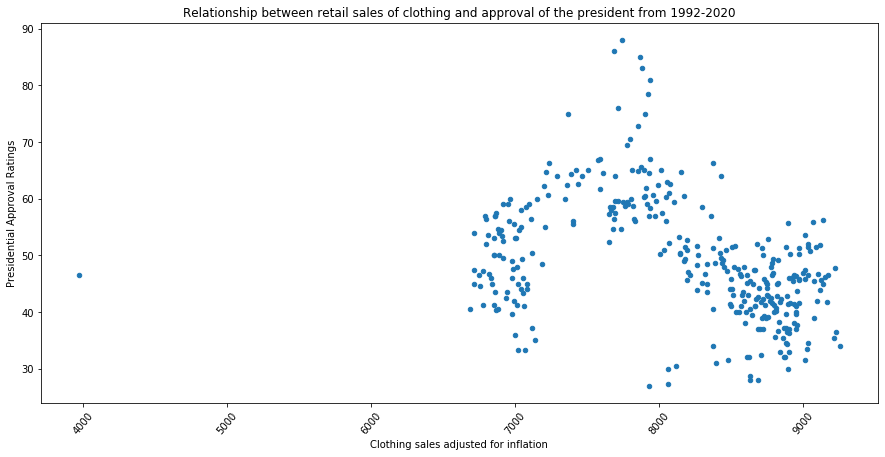

In [21]:
fig = df_merged.plot.scatter(x= 'sales_adjusted', y='Approving', rot = 50, figsize = (15, 7))
fig.set_xlabel('Clothing sales adjusted for inflation')
fig.set_ylabel('Presidential Approval Ratings')
fig.set_title('Relationship between retail sales of clothing and approval of the president from 1992-2020')

In [22]:
#look into outlier
df_merged.iloc[341:]

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President
341,2020-03-01,7485.0,-0.22%,0.531689,3970.958316,2020-03,2020-03-31,46.5,48.5,5.0,Trump


## COVID-19 Outlier

There's an outlier at sales_adjusted = 3970.956 most likely from falling clothing sales due to COVID-19. Since we have enough data on presidential approval ratings/clothing sales from President Trump's term prior to COVID-19, I will drop that one value for March 2020. This is to limit confounding economic variables from COVID-19 and keep focus on the relationship with presidential approval rating and clothing sales generally. 

In [23]:
df_merged = df_merged.loc[:340]

Text(0.5, 1.0, 'Relationship between retail sales of clothing and approval of the president from 1992-2020')

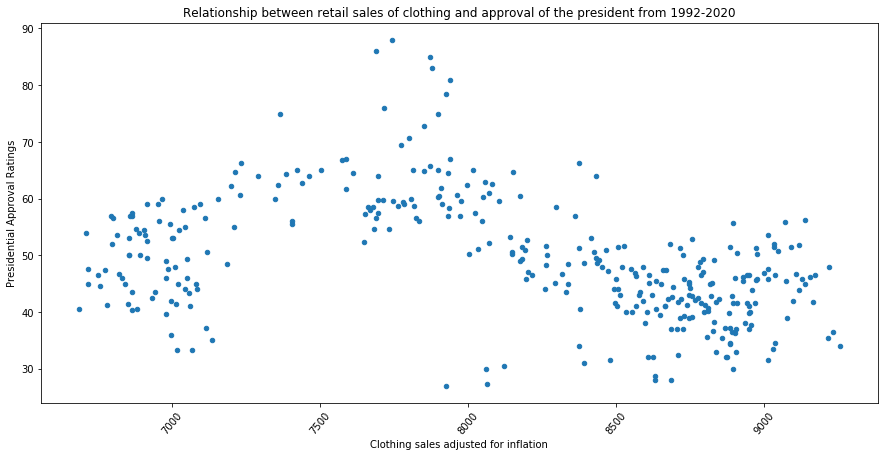

In [24]:
fig = df_merged.plot.scatter(x= 'sales_adjusted', y='Approving', rot = 50, figsize = (15, 7))
fig.set_xlabel('Clothing sales adjusted for inflation')
fig.set_ylabel('Presidential Approval Ratings')
fig.set_title('Relationship between retail sales of clothing and approval of the president from 1992-2020')

Text(0.5, 1.0, 'Relationship between retail sales of clothing and disapproval of the president from 1992-2020')

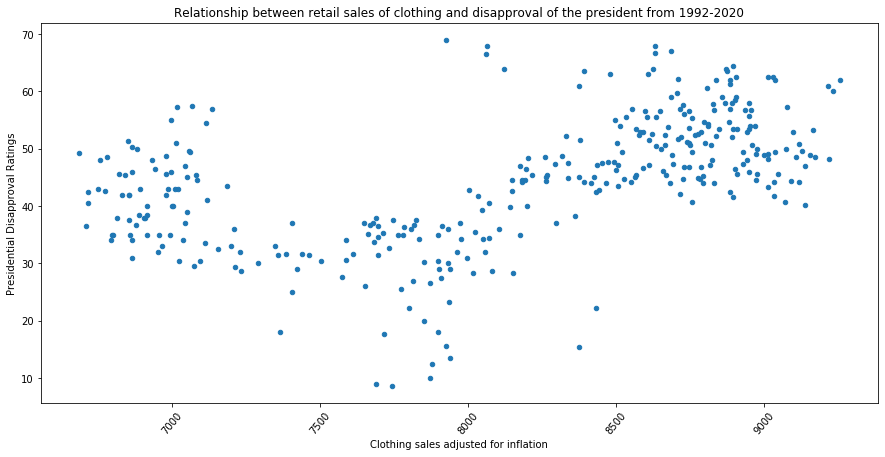

In [25]:
fig = df_merged.plot.scatter(x= 'sales_adjusted', y='Disapproving', rot = 50, figsize = (15, 7))
fig.set_xlabel('Clothing sales adjusted for inflation')
fig.set_ylabel('Presidential Disapproval Ratings')
fig.set_title('Relationship between retail sales of clothing and disapproval of the president from 1992-2020')

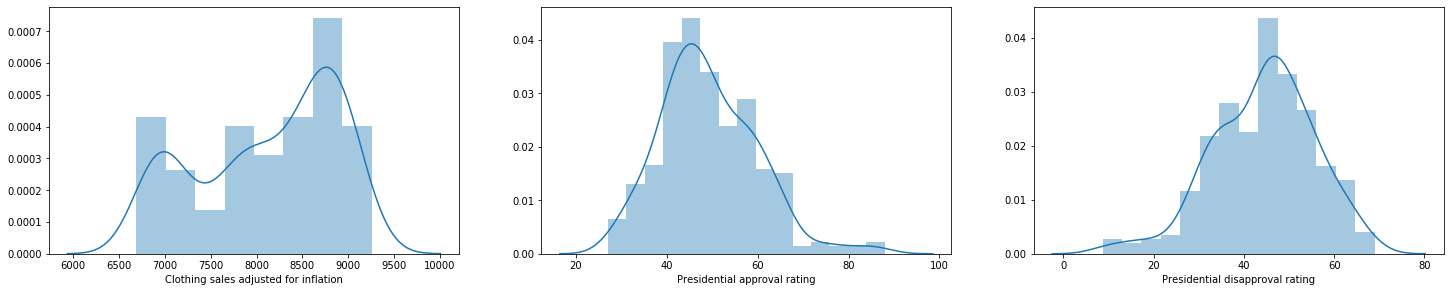

In [26]:
plt.figure(figsize=(25, 10))

plt.subplot(231)
sns.distplot(df_merged['sales_adjusted'])
plt.xlabel('Clothing sales adjusted for inflation')

plt.subplot(232)
sns.distplot(df_merged['Approving'])
plt.xlabel('Presidential approval rating');

plt.subplot(233)
sns.distplot(df_merged['Disapproving'])
plt.xlabel('Presidential disapproval rating');

In [66]:
df_merged.corr()

,sales,inflation_adjusted,sales_adjusted,Approving,Disapproving,Unsure/NoData,sales_as_percent
sales,1.000000,-0.984777,0.945778,-0.409572,0.502406,-0.273473,0.945778
inflation_adjusted,-0.984777,1.000000,-0.921533,0.338691,-0.434535,0.273129,-0.921533
sales_adjusted,0.945778,-0.921533,1.000000,-0.382958,0.492019,-0.363753,1.000000
Approving,-0.409572,0.338691,-0.382958,1.000000,-0.972990,-0.022897,-0.382958
Disapproving,0.502406,-0.434535,0.492019,-0.972990,1.000000,-0.200416,0.492019
Unsure/NoData,-0.273473,0.273129,-0.363753,-0.022897,-0.200416,1.000000,-0.363753
sales_as_percent,0.945778,-0.921533,1.000000,-0.382958,0.492019,-0.363753,1.000000


By looking in the columns/rows corresponding with 'sales_adjusted' and 'Approving', it seems as though there will be a negative correlation (-0.382958).

In [27]:
outcome, predictors = patsy.dmatrices('Approving ~ sales_adjusted', df_merged)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     58.26
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.35e-13
Time:                        20:31:37   Log-Likelihood:                -1263.4
No. Observations:                 341   AIC:                             2531.
Df Residuals:                     339   BIC:                             2538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         92.9359      5.760     16.

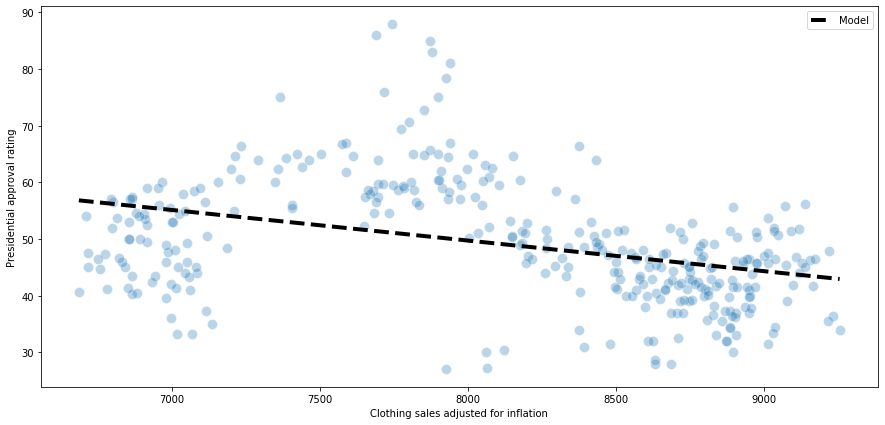

In [28]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_adjusted', y='Approving', alpha=0.3, data=df_merged, s=100)

# Generate and plot the model fit line
xs = np.arange(df_merged['sales_adjusted'].min(), df_merged['sales_adjusted'].max())
ys = -0.0054 * xs + 92.9359
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Clothing sales adjusted for inflation')
plt.ylabel('Presidential approval rating')
plt.legend();

## A Negative Correlation?

The predictor model here is slightly negative, perhaps indicating a negative correlation between presidential approval rating and clothing sales. There seems to be a lot of variance from the line, though.

In [29]:
#transforming sales_adjusted into percents
df_merged = df_merged.assign(sales_as_percent = ((df_merged['sales_adjusted'] / df_merged['sales_adjusted'].max()) * 100))
df_merged.head()

,date,sales,inflation,inflation_adjusted,sales_adjusted,date_month_only,End Date,Approving,Disapproving,Unsure/NoData,President,sales_as_percent
0,1992-01-01,6758.0,0.15%,0.998500,6758.000000,1992-01,1992-01-31,44.666667,48.000000,5.666667,Bush,73.010196
1,1992-02-01,6791.0,0.36%,0.994905,6780.813500,1992-02,1992-02-29,41.200000,48.600000,8.600000,Bush,73.256663
2,1992-03-01,6721.0,0.51%,0.989831,6686.759193,1992-03,1992-03-31,40.600000,49.200000,8.400000,Bush,72.240545
3,1992-04-01,6954.0,0.14%,0.988446,6883.287434,1992-04,1992-04-30,40.500000,50.000000,8.000000,Bush,74.363742
4,1992-05-01,6947.0,0.14%,0.987062,6866.731712,1992-05,1992-05-31,40.333333,50.333333,7.666667,Bush,74.184882


Text(0.5, 1.0, 'Clothing sales and presidential approval rating from 1992-2020')

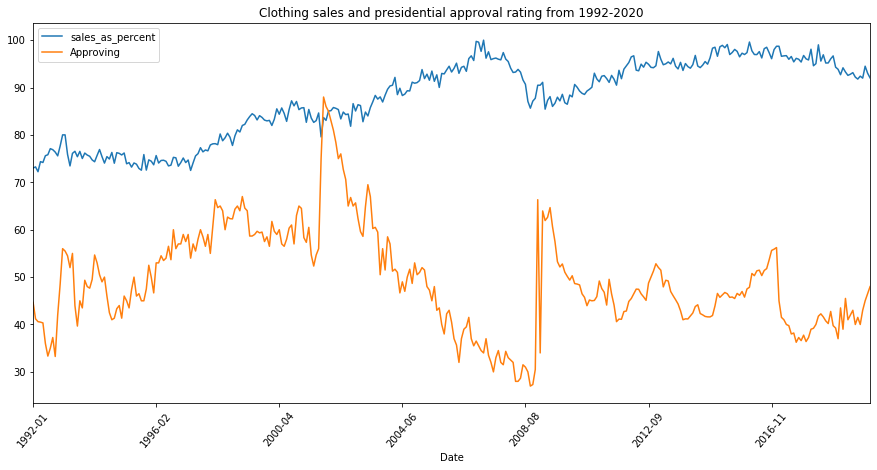

In [38]:
fig = df_merged.plot.line(x='date_month_only',y=['sales_as_percent', 'Approving'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Clothing sales and presidential approval rating from 1992-2020')

## Negative correlation from 2003-2007

It's still difficult to make out any precise correlation based on this. The two lines begin to slightly diverge from each other within the 2003-2007 range, again perhaps indicating that clothing sales are higher when approval rating is lowest. This pattern seems to continue on afterwards until 2020 following the large peak in presidential approval rating in 2008 (likely due to response to the economic crisis). There still seems to be a pattern of positive correlation from around 1992-2003.

I am going to split the dataset between 1992-2003 and 2003-2020 to further understand the different correlations within each period.

Text(0.5, 1.0, 'Clothing sales and presidential approval rating from 2003-2020')

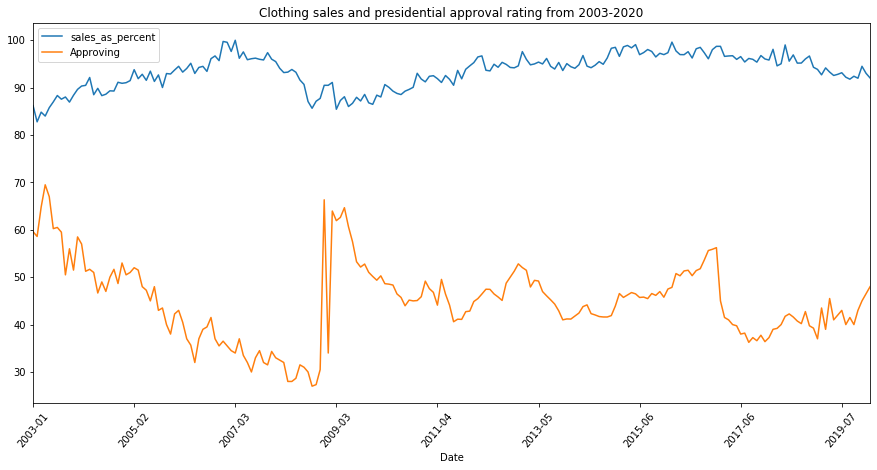

In [63]:
#splitting df_merged with data from only 2003-2020
df_03_to_20 = df_merged.iloc[133:]
df_03_to_20
fig = df_03_to_20.plot.line(x='date_month_only',y=['sales_as_percent', 'Approving'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Clothing sales and presidential approval rating from 2003-2020')

In [61]:
#predictor model for df_03_to_20
outcome, predictors = patsy.dmatrices('Approving ~ sales_adjusted', df_03_to_20)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     39.82
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.68e-09
Time:                        22:45:06   Log-Likelihood:                -712.00
No. Observations:                 208   AIC:                             1428.
Df Residuals:                     206   BIC:                             1435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        128.8068     13.314      9.

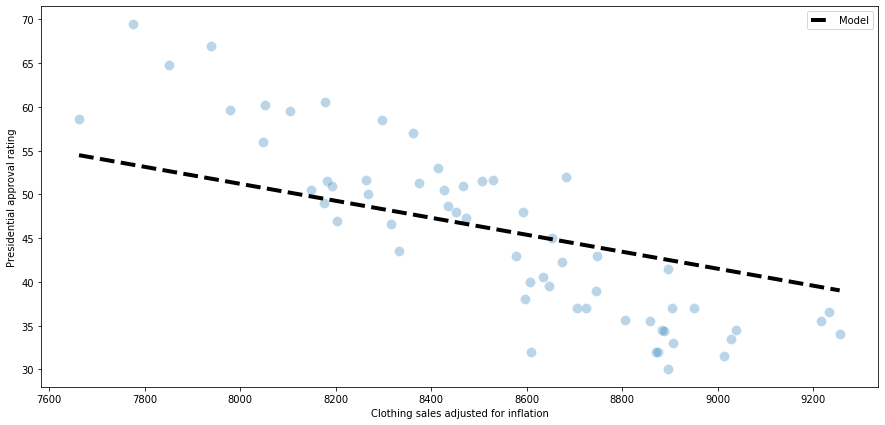

In [62]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_adjusted', y='Approving', alpha=0.3, data= df_03_to_07, s=100)

# Generate and plot the model fit line
xs = np.arange(df_03_to_07['sales_adjusted'].min(), df_merged['sales_adjusted'].max())
ys = -0.0097 * xs + 128.8068
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Clothing sales adjusted for inflation')
plt.ylabel('Presidential approval rating')
plt.legend();

## Negative Correlation from 2003-2020 

There looks to be a stronger negative correlation with the data from 2003-2020.

Text(0.5, 1.0, 'Clothing sales and presidential approval rating from 1992-2003')

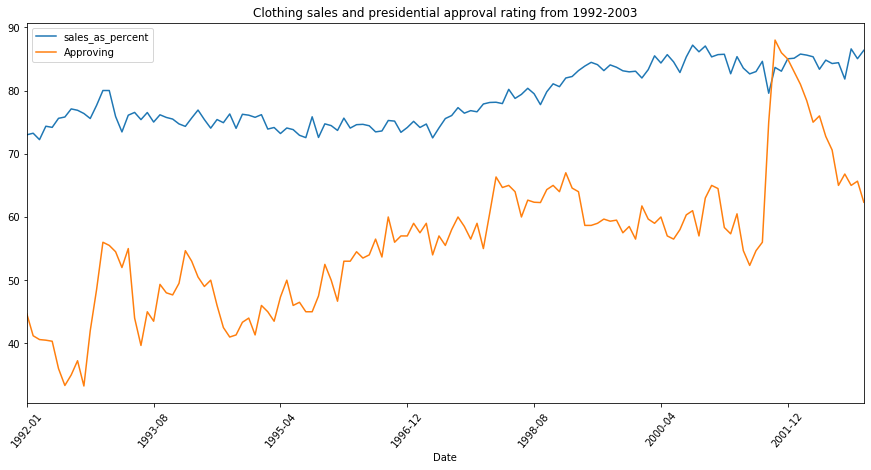

In [57]:
#splitting df_merged with data from only 1992-2003
df_92_to_03 = df_merged.iloc[:133]
df_92_to_03
fig = df_92_to_03.plot.line(x='date_month_only',y=['sales_as_percent', 'Approving'],rot=50,figsize=(15,7))
fig.set_xlabel('Date')
fig.set_title('Clothing sales and presidential approval rating from 1992-2003')

In [58]:
#predictor model for df_92_to_03
outcome, predictors = patsy.dmatrices('Approving ~ sales_adjusted', df_92_to_03)
mod = sm.OLS(outcome, predictors)
## fit the model
res = mod.fit()

## look at the results
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Approving   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     99.40
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           9.12e-18
Time:                        22:43:13   Log-Likelihood:                -466.00
No. Observations:                 133   AIC:                             936.0
Df Residuals:                     131   BIC:                             941.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -67.0515     12.351     -5.

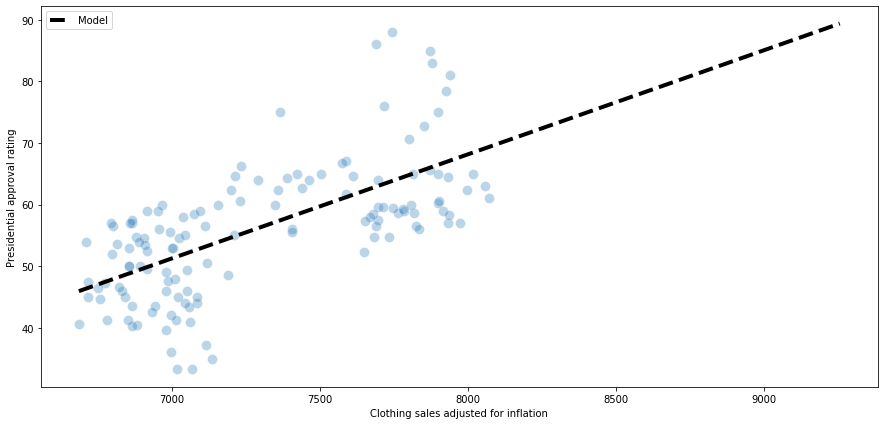

In [59]:
plt.figure(figsize=(15, 7))

# Plot the orginal data (as before)
sns.scatterplot(x='sales_adjusted', y='Approving', alpha=0.3, data= df_92_to_03, s=100)

# Generate and plot the model fit line
xs = np.arange(df_92_to_03['sales_adjusted'].min(), df_merged['sales_adjusted'].max())
ys = 0.0169 * xs -67.0515
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('Clothing sales adjusted for inflation')
plt.ylabel('Presidential approval rating')
plt.legend();

## Positive Correlation from 1992-2003

There is definitely a positive correlation from 1992 to 2003! This is interesting since the overall dataset and the sliced 2003-2020 data showed a negative correlation. 

## Conclusion/Other Notes

In conclusion, there seems to be a general negative correlation between clothing sales and presidential approval rating, where more sales are made the lower the rating. This contradicts our original hypothesis in that consumer spending would be higher in times of presidential approval. Furthermore, there seems to be a greater positive correlation from 1992-2003, while negative correlation is strongest from 2003-2020. Since it is unknown why specifically these two periods vary so drastically in their correlations, there seems to be suggestion of confounding variables.

Throughout the period between 1992-2020, clothing sales seem to be pretty steadily increasing, while at a higher rate at some points than others. On the other hand, the approval data is more variable, shifting between periods of growth and decline. It is possible that any of the correlations found are simply responsive to how the approval rating data is behaving. Especially since there is a positive correlation from 1992-2003 (when approval is also increasing), and a negative correlation from 2003-2020 (when approval is decreasing). 

It is also important to note, though, that during major peaks in approval rating, the clothing sales seem to inversely respond. For example, when approval peaks near 2001 and 2008, clothing sales also dip at the same time. It seems as though during major domestic crises (9/11 in 2001, 2008 economic crisis), clothing spending goes down while approval rating simultaneously goes up. It could be that presidential approval rating is generally higher during times of crisis, which also happens to be when clothing sales are falling. Furthermore, a possible confounding variable could be that sales are driven more by current events/crises of the time, rather than the presidenital approval rating necessarily. Or, maybe, a combination of both.